This example notebook uses the averaging functions found ins the diff_classifier msd module to find average msd profiles over input msd datasets using precision-weighted averaging. Precision is the inverse of the standard squared error. This increases the contribution of videos that have many particles and more homogeneous datasets to the final calculated MSD.

In [1]:
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.msd as msd

In [2]:
folder = 'Gel_Studies/11_09_18_gel_experiment'
bucket = 'ccurtis.data'
#experiment = 'test' #Used for naming purposes. Should exclude XY and well information

#vids = 2
to_track = []
labels = []
frames = 651
fps = 100.02
umppx = 0.07

vids = 20
gels = ['0_4', '0_6', '0_8', '1_0', '1_2']
for gel in gels:
    for num in range(1, vids+1):
        #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
        to_track.append('Gels_{}_XY{}'.format(gel, '%02d' % num))

#to_track

In [7]:
geomean = {}
for gel in gels:
    #aws.download_s3('{}/geomean_{}.csv'.format(folder, gel), 'geomean_{}.csv'.format(gel), bucket_name=bucket)
    geomean[gel] = np.genfromtxt('geomean_{}.csv'.format(gel))
    print('Diffusion Coefficient of {} % gel: {}'.format(gel, np.exp(geomean[gel][100])/4))

Diffusion Coefficient of 0_4 % gel: 0.5077720689104881
Diffusion Coefficient of 0_6 % gel: 0.4336420868171348
Diffusion Coefficient of 0_8 % gel: 0.23139777894006364
Diffusion Coefficient of 1_0 % gel: 0.2238476117719109
Diffusion Coefficient of 1_2 % gel: 0.16907063505602435


In [3]:
experiment = 'gels'
slices, bins, well_names = msd.binning(to_track, wells = 5, prefix=experiment)

In [4]:
geomean = {}
gSEM = {}
for sample_name in to_track:
    # Users can toggle between using pre-calculated geomean files and calculating new values by commenting out the relevant
    # lines of code within the for loop.
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=umppx, fps=fps,
    #                                                             remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with Gels_0_4_XY01
Done with Gels_0_4_XY02
Done with Gels_0_4_XY03
Done with Gels_0_4_XY04
Done with Gels_0_4_XY05
Done with Gels_0_4_XY06
Done with Gels_0_4_XY07
Done with Gels_0_4_XY08
Done with Gels_0_4_XY09
Done with Gels_0_4_XY10
Done with Gels_0_4_XY11
Done with Gels_0_4_XY12
Done with Gels_0_4_XY13
Done with Gels_0_4_XY14
Done with Gels_0_4_XY15
Done with Gels_0_4_XY16
Done with Gels_0_4_XY17
Done with Gels_0_4_XY18
Done with Gels_0_4_XY19
Done with Gels_0_4_XY20
Done with Gels_0_6_XY01
Done with Gels_0_6_XY02
Done with Gels_0_6_XY03
Done with Gels_0_6_XY04
Done with Gels_0_6_XY05
Done with Gels_0_6_XY06
Done with Gels_0_6_XY07
Done with Gels_0_6_XY08
Done with Gels_0_6_XY09
Done with Gels_0_6_XY10
Done with Gels_0_6_XY11
Done with Gels_0_6_XY12
Done with Gels_0_6_XY13
Done with Gels_0_6_XY14
Done with Gels_0_6_XY15
Done with Gels_0_6_XY16
Done with Gels_0_6_XY17
Done with Gels_0_6_XY18
Done with Gels_0_6_XY19
Done with Gels_0_6_XY20
Done with Gels_0_8_XY01
Done with Gels_0

In [18]:
exps = []
for typ in gels:
    to_avg = []
    for sample in to_track:
        combi = '{}'.format(typ)
        if combi in sample:
            to_avg.append(sample)

    weights, wh1 = msd.precision_weight(to_avg, gSEM)
    geodata = msd.precision_averaging(to_avg, geomean, gSEM, weights,
                                      bucket=bucket, folder=folder, experiment=typ)
    exps.append(typ)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:609: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:656: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:660: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


Note that in cases where two or more averaging steps are needed (for instance, if the user takes 5 videos per well with a total of four wells), averaging steps can be performed consecutively. the msd.binning function is a helpful tool by defining bins over which to average for multi-step averaging.

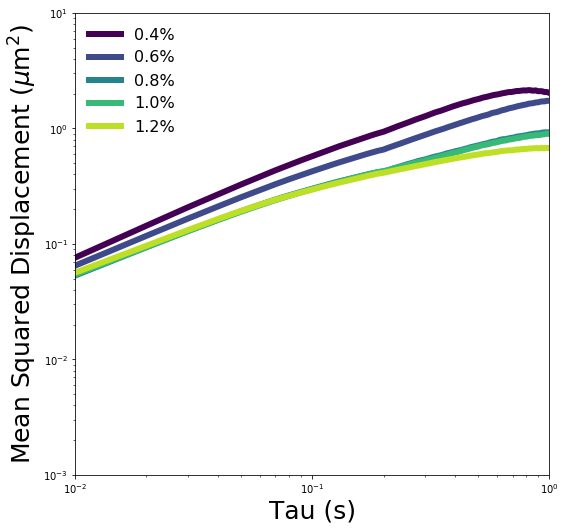

In [20]:
msd.plot_all_experiments(gels,
                         yrange=(10**-3, 10**1), bucket=bucket, folder=folder,
                         labels = ['0.4%', '0.6%', '0.8%', '1.0%', '1.2%',])

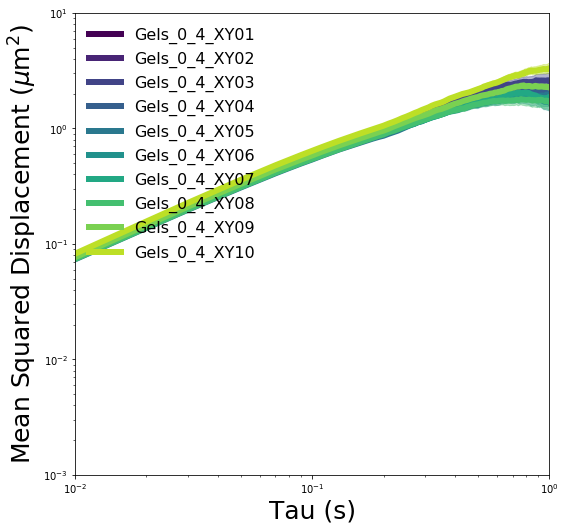

In [11]:
msd.plot_all_experiments(to_track[0:10], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

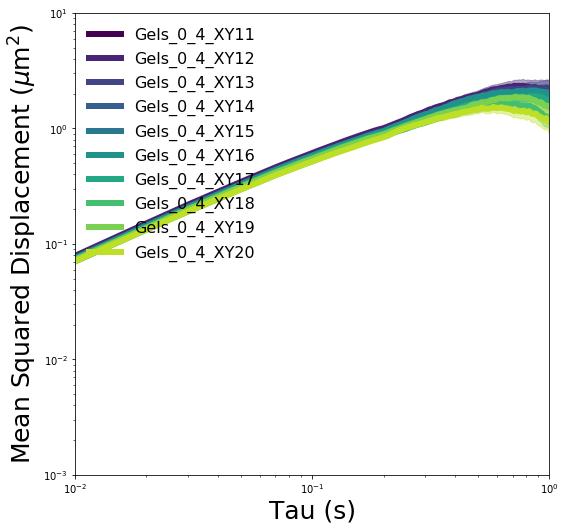

In [12]:
msd.plot_all_experiments(to_track[10:20], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

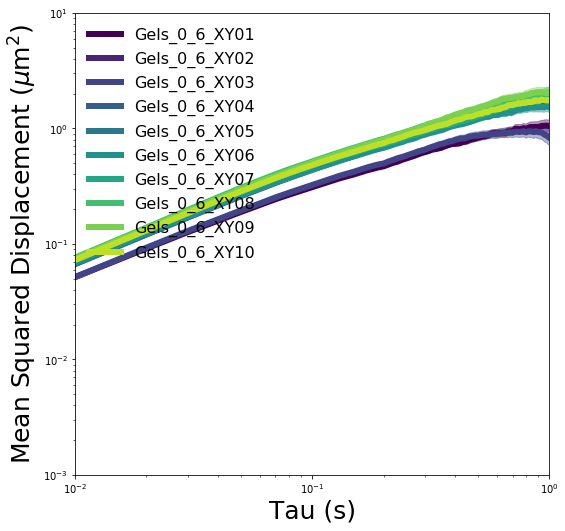

In [13]:
msd.plot_all_experiments(to_track[20:30], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

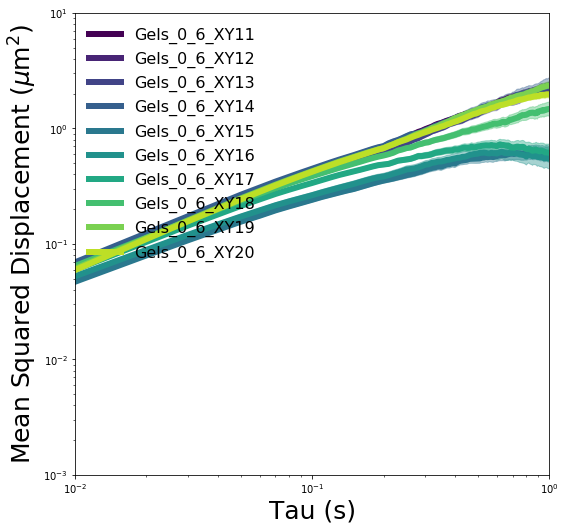

In [14]:
msd.plot_all_experiments(to_track[30:40], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

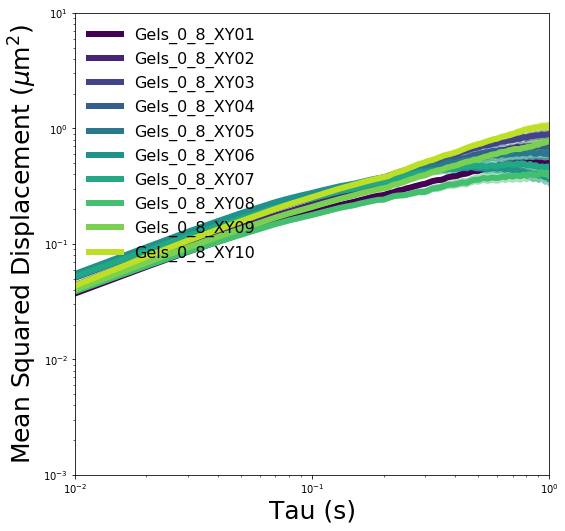

In [21]:
msd.plot_all_experiments(to_track[40:50], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

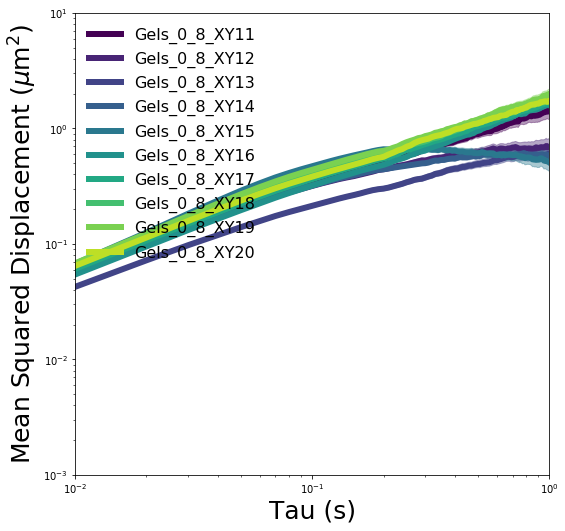

In [22]:
msd.plot_all_experiments(to_track[50:60], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

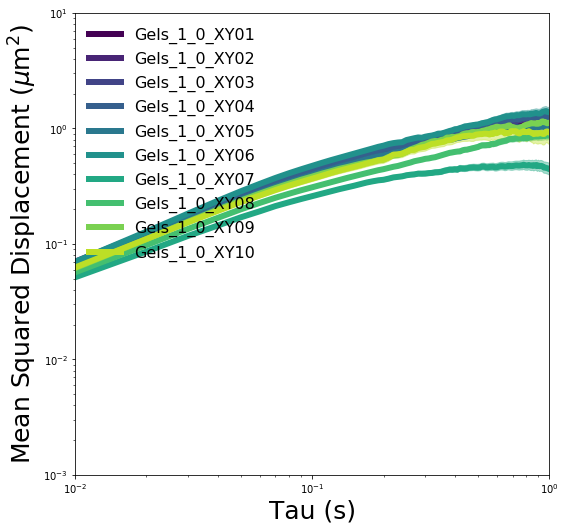

In [23]:
msd.plot_all_experiments(to_track[60:70], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

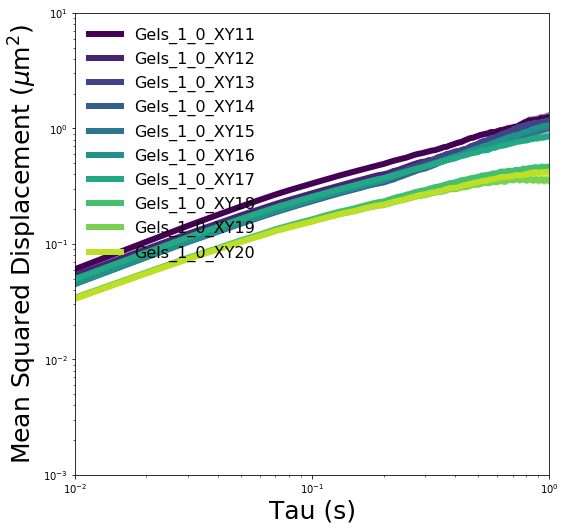

In [24]:
msd.plot_all_experiments(to_track[70:80], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

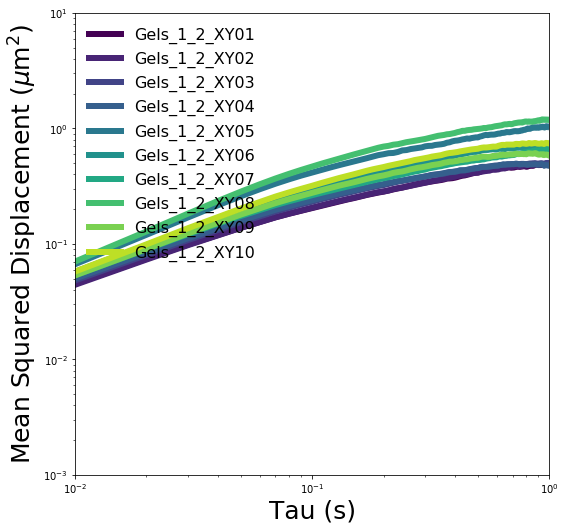

In [25]:
msd.plot_all_experiments(to_track[80:90], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)

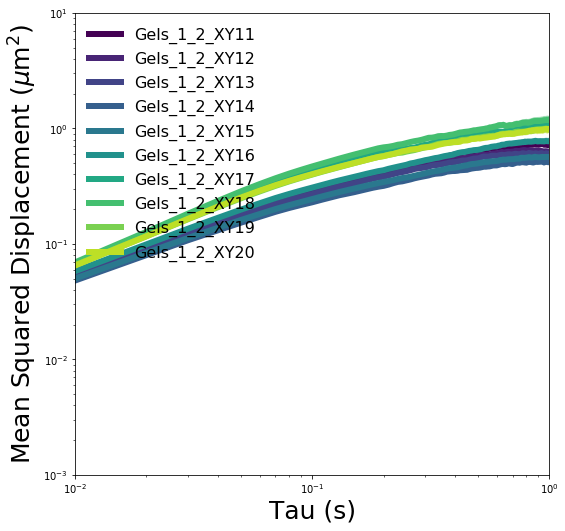

In [26]:
msd.plot_all_experiments(to_track[90:100], yrange=(10**-3, 10**1), bucket=bucket, folder=folder)